# TAIS - TP Python
## Analyse des zones d'influence : un exemple avec des données de bornes Vélib d'OpenData Paris

Quelques bibliothèques Python pour traiter et analyser des données géographiques ou spatialisées:
*   Shapely
*   Geopandas
*   PySal
*   Fiona
*   Folium
*   scikit-mobility (mobilité, trajectoires)
*   ...









Données :

**Vélib - Vélos et bornes - Disponibilité temps réel**
(du 21/01/2023, accès dynamique et en continu via un API)

https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/

**Description** :
Vélib’ Métropole, ce sont près de 1 400 stations réparties sur 55 communes en Métropole et près de 400 km² desservis, soit le plus grand service de vélos partagés au monde incluant des vélos électriques rechargeables en station.

Les données mises à disposition sont des données de type dynamique permettant de suivre l’évolution du service en temps réel. Le moment de la dernière mise à jour est renseigné dans chaque base.

Ces données vous permettront de connaître en temps réel le nombre de vélos mécaniques/électriques à chaque station ainsi que le nombre de bornettes libres.


Complément : Belib' - Points de recharge pour véhicules électriques - Disponibilité temps réel.

In [98]:
!git clone https://github.com/PSIG-EHESS/TAIS.git
data_folder = "TAIS/donnees/"

# https://education.github.com/git-cheat-sheet-education.pdf

fatal: destination path 'TAIS' already exists and is not an empty directory.


In [99]:
!pip install geopandas

In [100]:
import geopandas
import pandas as pd

In [101]:
velos_bornes = geopandas.read_file(data_folder+"vecteurs/opendata-paris/velib-disponibilite-en-temps-reel.shp", encoding='utf-8')


In [102]:
velos_bornes.stationcode.describe() #pas besoin de convertir le type des valeurs en chiffre

count     1467
unique    1467
top       9020
freq         1
Name: stationcode, dtype: object

In [103]:
velos_bornes

,stationcode,name,is_installe,capacity,numdocksava,numbikesava,mechanical,ebike,is_renting,is_returnin,duedate,nom_arrondi,code_insee_,geometry
0,9020,Toudouze - Clauzel,OUI,21,17,4,1,3,OUI,OUI,2024-05-20 15:56:45+02:00,Paris,None,POINT (2.33736 48.87930)
1,16107,Benjamin Godard - Victor Hugo,OUI,35,32,3,2,1,OUI,OUI,2024-05-20 15:57:09+02:00,Paris,None,POINT (2.27572 48.86598)
2,12109,Mairie du 12ème,OUI,30,22,7,5,2,OUI,OUI,2024-05-20 15:51:54+02:00,Paris,None,POINT (2.38755 48.84086)
3,31104,Mairie de Rosny-sous-Bois,OUI,30,3,24,11,13,OUI,OUI,2024-05-20 15:56:47+02:00,Rosny-sous-Bois,None,POINT (2.48658 48.87126)
4,14014,Jourdan - Stade Charléty,OUI,60,31,28,14,14,OUI,OUI,2024-05-20 15:57:17+02:00,Paris,None,POINT (2.34334 48.81943)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,15122,Place Charles Vallin,OUI,26,20,5,2,3,OUI,OUI,2024-05-20 15:56:57+02:00,Paris,None,POINT (2.30260 48.83552)
1463,1003,Saint-Denis - Rivoli,OUI,43,5,63,41,22,OUI,OUI,2024-05-20 15:57:08+02:00,Paris,None,POINT (2.34769 48.85906)
1464,27004,Gare de la Garenne-Colombes,OUI,0,0,0,0,0,NON,NON,2018-12-21 15:48:55+01:00,Colombes,None,POINT (2.23915 48.90975)
1465,21404,Jean Jaurès - Gare de Clamart,NON,0,0,0,0,0,NON,NON,2024-03-08 10:28:13+01:00,Clamart,None,POINT (2.27168 48.81322)


Informations disponibles par borne :
- Identifiant station
- Nom station
-	Station en fonctionnement (is_installe)
-	Capacité de la station (capacity)
-	Nombre bornettes libres	(numdocksava)
- Nombre total vélos disponibles (numbikesava)
-	Vélos mécaniques disponibles (mechanical)
-	Vélos électriques disponibles (ebike)
-	Borne de paiement disponible (is_renting)
-	Retour vélib possible (is_returnin)
-	Actualisation de la donnée
-	Coordonnées géographiques
-	Nom communes équipées

Plus d'informations [ici](https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/information/?disjunctive.name&disjunctive.is_installed&disjunctive.is_renting&disjunctive.is_returning&disjunctive.nom_arrondissement_communes).


In [104]:
velos_bornes.set_index("stationcode") #moyen de vérifier l'intégrité des identifiants de vos données (unicité)

,name,is_installe,capacity,numdocksava,numbikesava,mechanical,ebike,is_renting,is_returnin,duedate,nom_arrondi,code_insee_,geometry
stationcode,,,,,,,,,,,,,
9020,Toudouze - Clauzel,OUI,21,17,4,1,3,OUI,OUI,2024-05-20 15:56:45+02:00,Paris,None,POINT (2.33736 48.87930)
16107,Benjamin Godard - Victor Hugo,OUI,35,32,3,2,1,OUI,OUI,2024-05-20 15:57:09+02:00,Paris,None,POINT (2.27572 48.86598)
12109,Mairie du 12ème,OUI,30,22,7,5,2,OUI,OUI,2024-05-20 15:51:54+02:00,Paris,None,POINT (2.38755 48.84086)
31104,Mairie de Rosny-sous-Bois,OUI,30,3,24,11,13,OUI,OUI,2024-05-20 15:56:47+02:00,Rosny-sous-Bois,None,POINT (2.48658 48.87126)
14014,Jourdan - Stade Charléty,OUI,60,31,28,14,14,OUI,OUI,2024-05-20 15:57:17+02:00,Paris,None,POINT (2.34334 48.81943)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15122,Place Charles Vallin,OUI,26,20,5,2,3,OUI,OUI,2024-05-20 15:56:57+02:00,Paris,None,POINT (2.30260 48.83552)
1003,Saint-Denis - Rivoli,OUI,43,5,63,41,22,OUI,OUI,2024-05-20 15:57:08+02:00,Paris,None,POINT (2.34769 48.85906)
27004,Gare de la Garenne-Colombes,OUI,0,0,0,0,0,NON,NON,2018-12-21 15:48:55+01:00,Colombes,None,POINT (2.23915 48.90975)


In [105]:
velos_bornes.sample(15)

,stationcode,name,is_installe,capacity,numdocksava,numbikesava,mechanical,ebike,is_renting,is_returnin,duedate,nom_arrondi,code_insee_,geometry
26,17026,Jouffroy d'Abbans - Wagram,OUI,40,28,11,6,5,OUI,OUI,2024-05-20 15:53:48+02:00,Paris,None,POINT (2.30113 48.88197)
570,2110,Jeûneurs - Mulhouse,OUI,28,12,15,5,10,OUI,OUI,2024-05-20 15:56:40+02:00,Paris,None,POINT (2.34693 48.86900)
958,32013,Saint-Denis - Université,OUI,24,7,17,4,13,OUI,OUI,2024-05-20 15:57:02+02:00,Saint-Denis,None,POINT (2.36383 48.94563)
326,24002,Gare de Courbevoie,OUI,35,34,1,0,1,OUI,OUI,2024-05-20 15:54:16+02:00,Courbevoie,None,POINT (2.25065 48.89939)
636,10039,Sambre et Meuse - Villette,OUI,25,20,4,2,2,OUI,OUI,2024-05-20 15:54:08+02:00,Paris,None,POINT (2.37381 48.87441)
364,26001,Gare d'Asnières sur Seine,OUI,24,4,19,12,7,OUI,OUI,2024-05-20 15:57:07+02:00,Asnières-sur-Seine,None,POINT (2.28351 48.90636)
322,12034,Pirogues de Bercy - Libourne,OUI,49,0,49,34,15,OUI,OUI,2024-05-20 15:56:20+02:00,Paris,None,POINT (2.38637 48.83231)
422,18025,Mairie du 18ème,OUI,40,37,2,0,2,OUI,OUI,2024-05-20 15:53:57+02:00,Paris,None,POINT (2.34455 48.89294)
498,4110,Neuve Saint-Pierre - Beautreillis,OUI,20,2,16,10,6,OUI,OUI,2024-05-20 15:56:47+02:00,Paris,None,POINT (2.36391 48.85355)
268,42029,Stalingrad - Germaine Tailleferre,OUI,28,21,4,1,3,OUI,OUI,2024-05-20 15:54:36+02:00,Ivry-sur-Seine,None,POINT (2.37867 48.80257)


Reprojetter les geometries en pseudo-mercator

In [106]:
if velos_bornes.crs is None:
    velos_bornes = velos_bornes.set_crs("EPSG:4326")  # Définir à WGS84 si pas de CRS (par défaut)

# Projeter en EPSG:3857 (pseudo-Mercator)
velos_bornes = velos_bornes.to_crs(epsg=3857)

In [107]:
velos_bornes

,stationcode,name,is_installe,capacity,numdocksava,numbikesava,mechanical,ebike,is_renting,is_returnin,duedate,nom_arrondi,code_insee_,geometry
0,9020,Toudouze - Clauzel,OUI,21,17,4,1,3,OUI,OUI,2024-05-20 15:56:45+02:00,Paris,None,POINT (260193.734 6254405.199)
1,16107,Benjamin Godard - Victor Hugo,OUI,35,32,3,2,1,OUI,OUI,2024-05-20 15:57:09+02:00,Paris,None,POINT (253332.548 6252152.031)
2,12109,Mairie du 12ème,OUI,30,22,7,5,2,OUI,OUI,2024-05-20 15:51:54+02:00,Paris,None,POINT (265781.401 6247900.886)
3,31104,Mairie de Rosny-sous-Bois,OUI,30,3,24,11,13,OUI,OUI,2024-05-20 15:56:47+02:00,Rosny-sous-Bois,None,POINT (276804.904 6253044.485)
4,14014,Jourdan - Stade Charléty,OUI,60,31,28,14,14,OUI,OUI,2024-05-20 15:57:17+02:00,Paris,None,POINT (260858.901 6244277.517)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,15122,Place Charles Vallin,OUI,26,20,5,2,3,OUI,OUI,2024-05-20 15:56:57+02:00,Paris,None,POINT (256324.110 6246999.167)
1463,1003,Saint-Denis - Rivoli,OUI,43,5,63,41,22,OUI,OUI,2024-05-20 15:57:08+02:00,Paris,None,POINT (261344.134 6250980.462)
1464,27004,Gare de la Garenne-Colombes,OUI,0,0,0,0,0,NON,NON,2018-12-21 15:48:55+01:00,Colombes,None,POINT (249260.481 6259562.047)
1465,21404,Jean Jaurès - Gare de Clamart,NON,0,0,0,0,0,NON,NON,2024-03-08 10:28:13+01:00,Clamart,None,POINT (252881.906 6243227.926)


<Axes: >

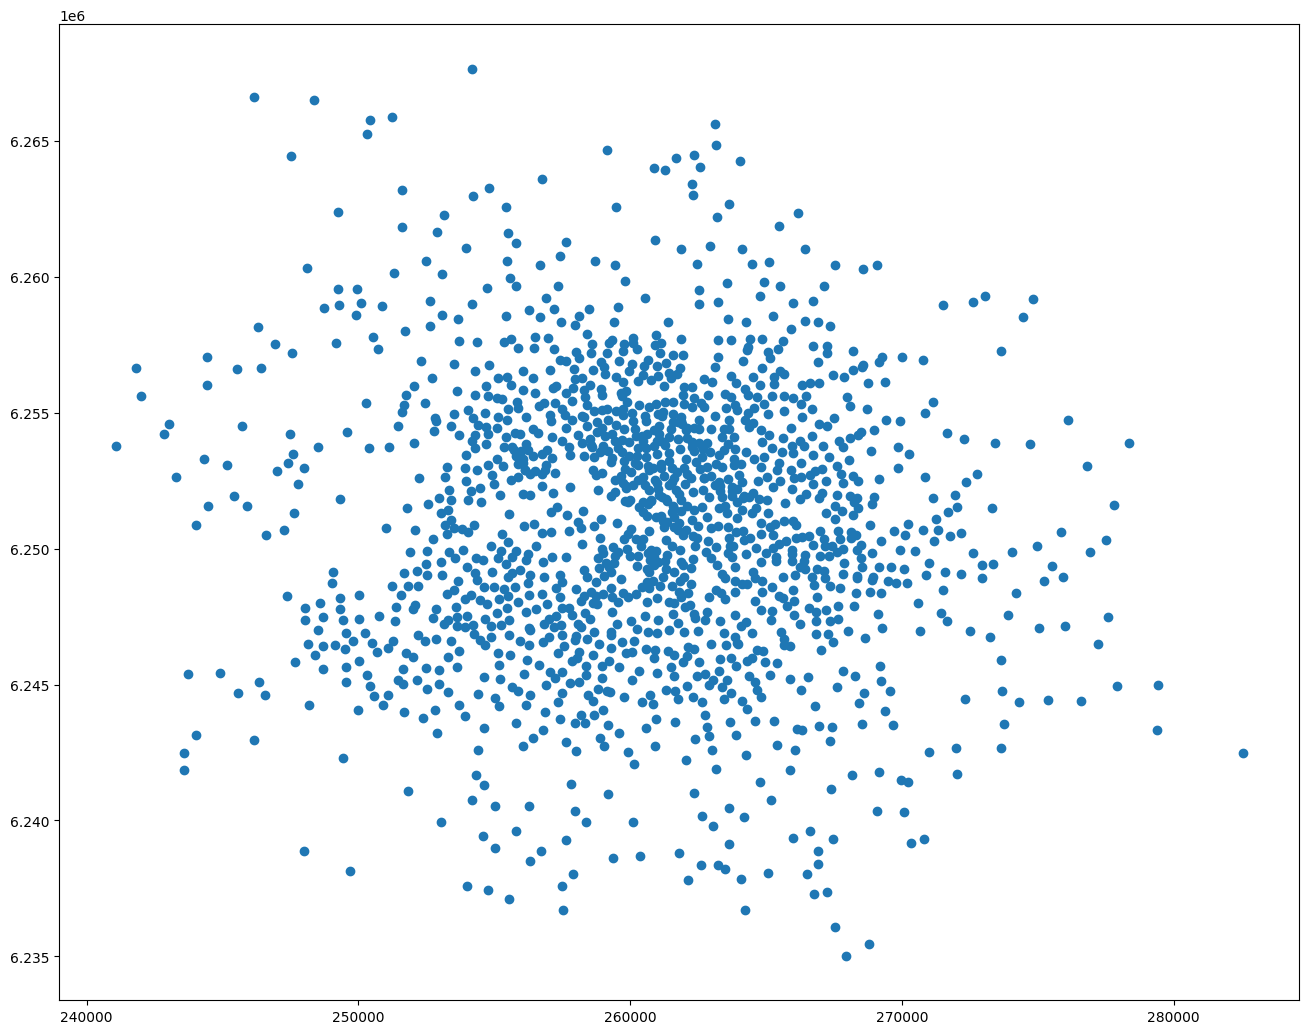

In [108]:
velos_bornes["geometry"].plot(figsize=(16, 16))

Nous examinons la capacité des bornes et leur disponibilité dans l'ensemble:

In [109]:
velos_bornes.capacity.describe()

count     1467
unique      65
top         30
freq        92
Name: capacity, dtype: object

In [110]:
velos_bornes['capacity_num'] = pd.to_numeric(velos_bornes['capacity'], errors='coerce')

In [111]:
velos_bornes['numdocksava_num'] = pd.to_numeric(velos_bornes['numdocksava'], errors='coerce')

In [112]:
velos_bornes['numbikesava_num'] = pd.to_numeric(velos_bornes['numbikesava'], errors='coerce')

In [113]:
velos_bornes.numbikesava_num.describe()

count    1467.000000
mean       10.832993
std        11.165568
min         0.000000
25%         3.000000
50%         7.000000
75%        16.000000
max        67.000000
Name: numbikesava_num, dtype: float64

In [114]:
velos_bornes.numdocksava_num.describe()

count    1467.000000
mean       19.606680
std        12.687342
min         0.000000
25%        10.000000
50%        19.000000
75%        27.000000
max        66.000000
Name: numdocksava_num, dtype: float64

In [115]:
gdf_quartier = geopandas.read_file(data_folder+"vecteurs/opendata-paris/quartier_paris.shp", encoding='utf-8')
# si l'on souhaite intégrer un fond de carte personnalisé

In [116]:
if gdf_quartier.crs is None:
    gdf_quartier = gdf_quartier.set_crs("EPSG:4326")  # Définir à WGS84 si pas de CRS (par défaut)

# Projeter en EPSG:3857 (pseudo-Mercator)
gdf_quartier = gdf_quartier.to_crs(epsg=3857)
gdf_quartier

,n_sq_qu,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface,geometry
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05,"POLYGON ((261892.848 6250278.054, 261878.189 6..."
1,750000016.0,16.0,7510404.0,Notre-Dame,4.0,750000004.0,3283.163371,3.782522e+05,"POLYGON ((262860.239 6249207.586, 262882.624 6..."
2,750000028.0,28.0,7510704.0,Gros-Caillou,7.0,750000007.0,4720.994373,1.381893e+06,"POLYGON ((257097.290 6250116.967, 256754.256 6..."
3,750000041.0,41.0,7511101.0,Folie-Méricourt,11.0,750000011.0,3724.352694,7.257525e+05,"POLYGON ((263838.620 6251776.642, 263482.224 6..."
4,750000007.0,7.0,7510203.0,Mail,2.0,750000002.0,2179.153605,2.781426e+05,"POLYGON ((261248.874 6251970.436, 261230.716 6..."
...,...,...,...,...,...,...,...,...,...
75,750000014.0,14.0,7510402.0,Saint-Gervais,4.0,750000004.0,2678.340923,4.220282e+05,"POLYGON ((263133.072 6250408.071, 263041.637 6..."
76,750000025.0,25.0,7510701.0,Saint-Thomas-d'Aquin,7.0,750000007.0,3827.253353,8.265594e+05,"POLYGON ((258498.720 6249320.831, 258321.460 6..."
77,750000038.0,38.0,7511002.0,Porte-Saint-Denis,10.0,750000010.0,2736.292954,4.721136e+05,"POLYGON ((262195.776 6253045.529, 262075.089 6..."
78,750000001.0,1.0,7510101.0,Saint-Germain-l'Auxerrois,1.0,750000001.0,5057.549475,8.690007e+05,"POLYGON ((260998.942 6250132.905, 260998.863 6..."


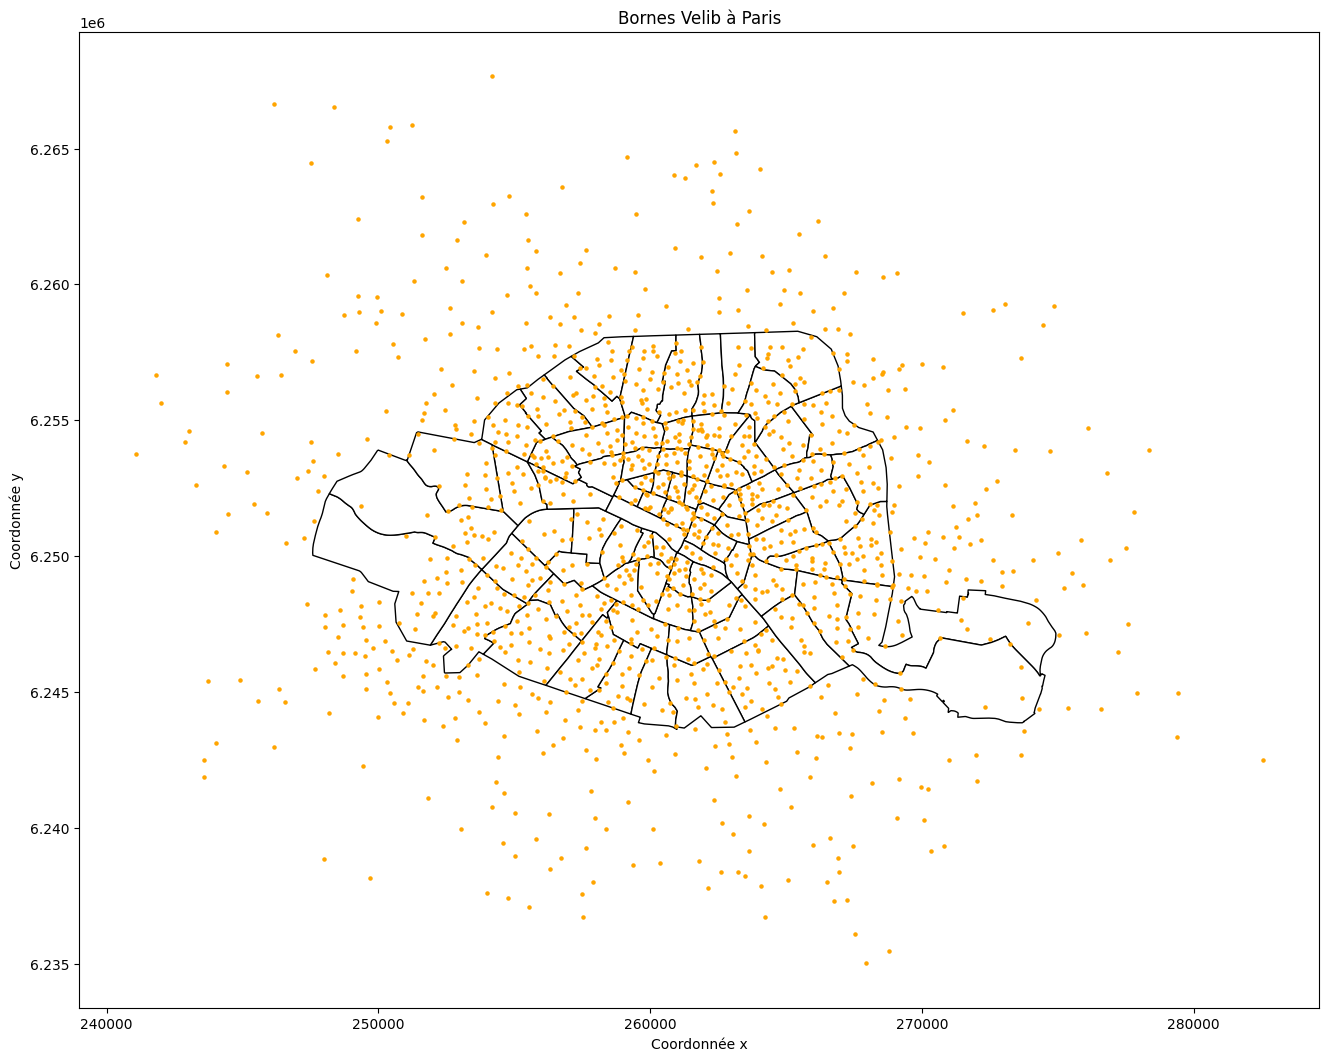

In [117]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 16))

# Afficher les jeux de données sur la carte
gdf_quartier.plot(ax=ax, color='white', edgecolor='black')
velos_bornes.plot(ax=ax, color='orange', markersize=5)

# Ajouter une grille de coordonnées et un titre
ax.set_xlabel('Coordonnée x')
ax.set_ylabel('Coordonnée y')
ax.set_title('Bornes Velib à Paris')

# Afficher la carte
plt.show()

In [118]:
df_bornes_par_quartier = geopandas.sjoin(velos_bornes, gdf_quartier, how="inner", op='intersects')
#l'ordre des paramètres est important et impacte la forme du résultat obtenu

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [119]:
df_bornes_par_quartier
# la géométrie d l'entité (ligne) est celle de la borne (point)

,stationcode,name,is_installe,capacity,numdocksava,numbikesava,mechanical,ebike,is_renting,is_returnin,...,numbikesava_num,index_right,n_sq_qu,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface
0,9020,Toudouze - Clauzel,OUI,21,17,4,1,3,OUI,OUI,...,4,72,750000033.0,33.0,7510901.0,Saint-Georges,9.0,750000009.0,3429.188334,717091.569643
81,9038,Douai - Bruxelles,OUI,27,25,2,1,1,OUI,OUI,...,2,72,750000033.0,33.0,7510901.0,Saint-Georges,9.0,750000009.0,3429.188334,717091.569643
103,9028,Moncey - Blanche,OUI,17,14,2,1,1,OUI,OUI,...,2,72,750000033.0,33.0,7510901.0,Saint-Georges,9.0,750000009.0,3429.188334,717091.569643
305,9021,Saint Georges - d'Aumale,OUI,23,20,3,0,3,OUI,OUI,...,3,72,750000033.0,33.0,7510901.0,Saint-Georges,9.0,750000009.0,3429.188334,717091.569643
468,9026,Jean-Baptiste Pigalle - La Bruyere,OUI,17,15,1,0,1,OUI,OUI,...,1,72,750000033.0,33.0,7510901.0,Saint-Georges,9.0,750000009.0,3429.188334,717091.569643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,3002,Saint-Gilles - Turenne,OUI,18,2,16,11,5,OUI,OUI,...,16,49,750000011.0,11.0,7510303.0,Archives,3.0,750000003.0,2534.100042,367728.386867
1363,3201,Payenne - Square George Caïn,OUI,24,3,20,16,4,OUI,OUI,...,20,49,750000011.0,11.0,7510303.0,Archives,3.0,750000003.0,2534.100042,367728.386867
1012,3003,Fille du Calvaire - Turenne,OUI,29,14,14,10,4,OUI,OUI,...,14,31,750000010.0,10.0,7510302.0,Enfants-Rouges,3.0,750000003.0,2139.625388,271750.323937
1075,3006,Mairie du 3ème,OUI,32,12,19,15,4,OUI,OUI,...,19,31,750000010.0,10.0,7510302.0,Enfants-Rouges,3.0,750000003.0,2139.625388,271750.323937


In [120]:
df_quartier_avec_bornes = geopandas.sjoin(gdf_quartier, velos_bornes, how="inner", op='intersects')


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [121]:
df_quartier_avec_bornes
# la géométrie d l'entité (ligne) est celle du quartier (polygone)

,n_sq_qu,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface,geometry,index_right,...,mechanical,ebike,is_renting,is_returnin,duedate,nom_arrondi,code_insee_,capacity_num,numdocksava_num,numbikesava_num
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05,"POLYGON ((261892.848 6250278.054, 261878.189 6...",813,...,41,15,OUI,OUI,2024-05-20 15:57:04+02:00,Paris,None,60,3,56
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05,"POLYGON ((261892.848 6250278.054, 261878.189 6...",1085,...,9,3,OUI,OUI,2024-05-20 15:56:29+02:00,Paris,None,14,2,12
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05,"POLYGON ((261892.848 6250278.054, 261878.189 6...",1043,...,21,1,OUI,OUI,2024-05-20 15:57:00+02:00,Paris,None,25,1,22
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05,"POLYGON ((261892.848 6250278.054, 261878.189 6...",1105,...,13,5,OUI,OUI,2024-05-20 15:57:02+02:00,Paris,None,19,1,18
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05,"POLYGON ((261892.848 6250278.054, 261878.189 6...",913,...,20,10,OUI,OUI,2024-05-20 15:57:03+02:00,Paris,None,32,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,750000073.0,73.0,7511901.0,Villette,19.0,750000019.0,5191.018830,1.285705e+06,"POLYGON ((263882.703 6254219.331, 263857.977 6...",301,...,3,4,OUI,OUI,2024-05-20 15:57:16+02:00,Paris,None,30,21,7
79,750000073.0,73.0,7511901.0,Villette,19.0,750000019.0,5191.018830,1.285705e+06,"POLYGON ((263882.703 6254219.331, 263857.977 6...",948,...,0,1,OUI,OUI,2024-05-20 15:51:39+02:00,Paris,None,42,41,1
79,750000073.0,73.0,7511901.0,Villette,19.0,750000019.0,5191.018830,1.285705e+06,"POLYGON ((263882.703 6254219.331, 263857.977 6...",1223,...,3,1,OUI,OUI,2024-05-20 15:55:36+02:00,Paris,None,55,50,4
79,750000073.0,73.0,7511901.0,Villette,19.0,750000019.0,5191.018830,1.285705e+06,"POLYGON ((263882.703 6254219.331, 263857.977 6...",447,...,1,0,OUI,OUI,2024-05-20 15:53:19+02:00,Paris,None,19,18,1


In [122]:
df_quartier_avec_bornes[df_quartier_avec_bornes['c_qu'] == 13]['capacity']

0    60
0    14
0    25
0    19
0    32
0    29
0    23
0    26
0    16
Name: capacity, dtype: object

Pour cartographier la capacité des bornes (à un instant t) par quartier, il faut faire la somme de la capacité de l'ensemble des bornes d'un quartier.

In [123]:
sum_capacity_bornes_per_quartier = df_quartier_avec_bornes.groupby(['c_qu'],
    as_index=False,
)['capacity_num'].sum()
sum_capacity_bornes_per_quartier.columns = ['c_qu', 'sum_capacite']  # rename the column
sum_capacity_bornes_per_quartier

,c_qu,sum_capacite
0,1.0,67
1,2.0,378
2,3.0,184
3,4.0,118
4,5.0,114
...,...,...
75,76.0,297
76,77.0,305
77,78.0,355
78,79.0,384


Pour cartographier, il faudra ré-associer les géometries des quartiers.

In [124]:
capacite_sum_quartier = gdf_quartier.merge(
    sum_capacity_bornes_per_quartier,
    on='c_qu',
    how='left',
)
capacite_sum_quartier


,n_sq_qu,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface,geometry,sum_capacite
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05,"POLYGON ((261892.848 6250278.054, 261878.189 6...",244
1,750000016.0,16.0,7510404.0,Notre-Dame,4.0,750000004.0,3283.163371,3.782522e+05,"POLYGON ((262860.239 6249207.586, 262882.624 6...",100
2,750000028.0,28.0,7510704.0,Gros-Caillou,7.0,750000007.0,4720.994373,1.381893e+06,"POLYGON ((257097.290 6250116.967, 256754.256 6...",339
3,750000041.0,41.0,7511101.0,Folie-Méricourt,11.0,750000011.0,3724.352694,7.257525e+05,"POLYGON ((263838.620 6251776.642, 263482.224 6...",530
4,750000007.0,7.0,7510203.0,Mail,2.0,750000002.0,2179.153605,2.781426e+05,"POLYGON ((261248.874 6251970.436, 261230.716 6...",228
...,...,...,...,...,...,...,...,...,...,...
75,750000014.0,14.0,7510402.0,Saint-Gervais,4.0,750000004.0,2678.340923,4.220282e+05,"POLYGON ((263133.072 6250408.071, 263041.637 6...",191
76,750000025.0,25.0,7510701.0,Saint-Thomas-d'Aquin,7.0,750000007.0,3827.253353,8.265594e+05,"POLYGON ((258498.720 6249320.831, 258321.460 6...",292
77,750000038.0,38.0,7511002.0,Porte-Saint-Denis,10.0,750000010.0,2736.292954,4.721136e+05,"POLYGON ((262195.776 6253045.529, 262075.089 6...",271
78,750000001.0,1.0,7510101.0,Saint-Germain-l'Auxerrois,1.0,750000001.0,5057.549475,8.690007e+05,"POLYGON ((260998.942 6250132.905, 260998.863 6...",67


In [125]:
capacite_sum_quartier.sum_capacite.describe()

count      80.000000
mean      401.562500
std       228.560041
min        67.000000
25%       234.750000
50%       361.500000
75%       530.250000
max      1120.000000
Name: sum_capacite, dtype: float64

Création d'une carte dynamique des cercles proportionnels

In [126]:
import folium
from folium import Map, CircleMarker
import geopandas as gpd

#Folium fonctionne mieux avec des coordonnées WGS84 (4326)
# Projeter en EPSG:3857 (pseudo-Mercator)
capacite_sum_quartier_3857 = capacite_sum_quartier.to_crs(epsg=3857)

# Reprojeter en EPSG:4326 pour l'utiliser avec Folium
capacite_sum_quartier_4326 = capacite_sum_quartier_3857.to_crs(epsg=4326)

# Créer une carte centrée sur les coordonnées moyennes des géométries
m = folium.Map(location=[capacite_sum_quartier_4326.geometry.centroid.y.mean(),
                         capacite_sum_quartier_4326.geometry.centroid.x.mean()], zoom_start=12)

# Ajouter des cercles proportionnels pour chaque quartier
for idx, row in capacite_sum_quartier_4326.iterrows():
    folium.CircleMarker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        radius=row['sum_capacite'] / 50,  # Ajustez le facteur de division selon vos besoins
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=folium.Popup(f"Quartier: {row['l_qu']}<br>Capacité: {row['sum_capacite']}", parse_html=True)
    ).add_to(m)


<ipython-input-126-b3e7fa9c7352>:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[capacite_sum_quartier_4326.geometry.centroid.y.mean(),
<ipython-input-126-b3e7fa9c7352>:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  capacite_sum_quartier_4326.geometry.centroid.x.mean()], zoom_start=12)


Création de la legende pour cette carte

In [127]:
# Exemples de tailles pour la légende
example_sizes = [100, 500, 1000]  # Remplacez ces valeurs par des valeurs représentatives de vos données
legend_circles = ""
for size in example_sizes:
    radius = size / 50  # Utilisez le même facteur de division que pour les cercles sur la carte
    legend_circles += f"""
    &nbsp; <svg width="{2*radius}" height="{2*radius}">
        <circle cx="{radius}" cy="{radius}" r="{radius}" fill="blue" fill-opacity="0.6" stroke="blue"/>
    </svg>&nbsp; {size}<br>
    """

# Ajouter une légende
legend_html = f"""
     <div style="position: fixed;
     bottom: 50px; left: 50px; width: 170px; height: auto;
     background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
     padding: 10px;">
     <b>Légende</b> <br>
     Capacité: <br>
     {legend_circles}
     </div>
     """


Affichage de la carte et son enregistrement dans un fichier html

In [128]:
m.get_root().html.add_child(folium.Element(legend_html))

# Afficher la carte
m.save('carte_cercles_proportionnels.html')
m

TODO : modifiez le code précédant pour cartographier les deux autres informations, nombre de vélos disponibles.

Maintenant nous allons nous intéresser à la zone d'influence d'une borne (point d'interet) pour identifier les bornes les plus proches, par le biais de l'opération spatiale 'buffer' (ou zone tampon), voir cette [illustration](https://saylordotorg.github.io/text_essentials-of-geographic-information-systems/section_11/5c7eb6fc4bcbfc5117d778f0aabfded6.jpg).

Ce type d'analyse est également utilisé pour l'analyse de risque afin d'identifier les zones à risque, par exemple, les zones inondables, les zones à risque d'incendie, etc, pour les événements naturels ou les activités humaines.

In [129]:
df_bornes_par_quartier_14 = df_bornes_par_quartier.loc[df_bornes_par_quartier['c_ar'] == 14]


In [130]:
df_bornes_par_quartier_14

,stationcode,name,is_installe,capacity,numdocksava,numbikesava,mechanical,ebike,is_renting,is_returnin,...,numbikesava_num,index_right,n_sq_qu,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface
4,14014,Jourdan - Stade Charléty,OUI,60,31,28,14,14,OUI,OUI,...,28,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
51,14013,Liard - Amiral Mouchez,OUI,14,3,10,5,5,OUI,OUI,...,10,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
172,14012,Sibelle - Alésia,OUI,25,15,10,8,2,OUI,OUI,...,10,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
189,14124,David Weill - Parc Montsouris,OUI,22,12,8,1,7,OUI,OUI,...,8,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
617,14007,Ferrus - Saint-Jacques,OUI,34,31,3,2,1,OUI,OUI,...,3,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
657,14016,René Coty - Parc Montsouris,OUI,55,46,9,4,5,OUI,OUI,...,9,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
673,14125,Dareau - Broussais,OUI,24,20,4,2,2,OUI,OUI,...,4,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
1009,14135,Jourdan - Cité Universitaire,OUI,39,22,16,5,11,OUI,OUI,...,16,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
1275,14009,Tombe Issoire - René Coty,OUI,36,30,5,0,5,OUI,OUI,...,5,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
7,14111,Cassini - Denfert-Rochereau,OUI,25,19,6,3,3,OUI,OUI,...,6,36,750000053.0,53.0,7511401.0,Montparnasse,14.0,750000014.0,4565.136189,1.126205e+06


In [131]:
df_bornes_par_quartier_14.set_index("stationcode")

,name,is_installe,capacity,numdocksava,numbikesava,mechanical,ebike,is_renting,is_returnin,duedate,...,numbikesava_num,index_right,n_sq_qu,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface
stationcode,,,,,,,,,,,,,,,,,,,,,
14014,Jourdan - Stade Charléty,OUI,60,31,28,14,14,OUI,OUI,2024-05-20 15:57:17+02:00,...,28,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
14013,Liard - Amiral Mouchez,OUI,14,3,10,5,5,OUI,OUI,2024-05-20 15:50:41+02:00,...,10,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
14012,Sibelle - Alésia,OUI,25,15,10,8,2,OUI,OUI,2024-05-20 15:57:17+02:00,...,10,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
14124,David Weill - Parc Montsouris,OUI,22,12,8,1,7,OUI,OUI,2024-05-20 15:56:38+02:00,...,8,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
14007,Ferrus - Saint-Jacques,OUI,34,31,3,2,1,OUI,OUI,2024-05-20 15:53:36+02:00,...,3,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
14016,René Coty - Parc Montsouris,OUI,55,46,9,4,5,OUI,OUI,2024-05-20 15:53:09+02:00,...,9,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
14125,Dareau - Broussais,OUI,24,20,4,2,2,OUI,OUI,2024-05-20 15:56:55+02:00,...,4,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
14135,Jourdan - Cité Universitaire,OUI,39,22,16,5,11,OUI,OUI,2024-05-20 15:55:08+02:00,...,16,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
14009,Tombe Issoire - René Coty,OUI,36,30,5,0,5,OUI,OUI,2024-05-20 15:53:38+02:00,...,5,46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06


In [132]:
df_bornes_par_quartier_14.geometry.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [133]:
def buffer_in(geometry, distance_x_meters):
  crs = geometry.crs
  return geometry.to_crs(epsg=3857).buffer(distance_x_meters).to_crs(crs)

In [150]:
areas = buffer_in(df_bornes_par_quartier_14.set_index("stationcode").geometry, 300)
df_bornes_par_quartier_14_areas = areas.to_frame().rename(columns={0:'geometry'})
df_bornes_par_quartier_14_areas = geopandas.GeoDataFrame(df_bornes_par_quartier_14_areas, geometry=df_bornes_par_quartier_14_areas['geometry'])
df_bornes_par_quartier_14_areas


,geometry
stationcode,
14014,"POLYGON ((261158.901 6244277.517, 261157.456 6..."
14013,"POLYGON ((261028.838 6244613.724, 261027.393 6..."
14012,"POLYGON ((260620.445 6245507.302, 260619.001 6..."
14124,"POLYGON ((260089.156 6244558.856, 260087.711 6..."
14007,"POLYGON ((260882.931 6246299.709, 260881.487 6..."
14016,"POLYGON ((260356.237 6245184.273, 260354.793 6..."
14125,"POLYGON ((260362.413 6246196.216, 260360.968 6..."
14135,"POLYGON ((260754.301 6244356.811, 260752.857 6..."
14009,"POLYGON ((260159.920 6246151.754, 260158.475 6..."


<Axes: >

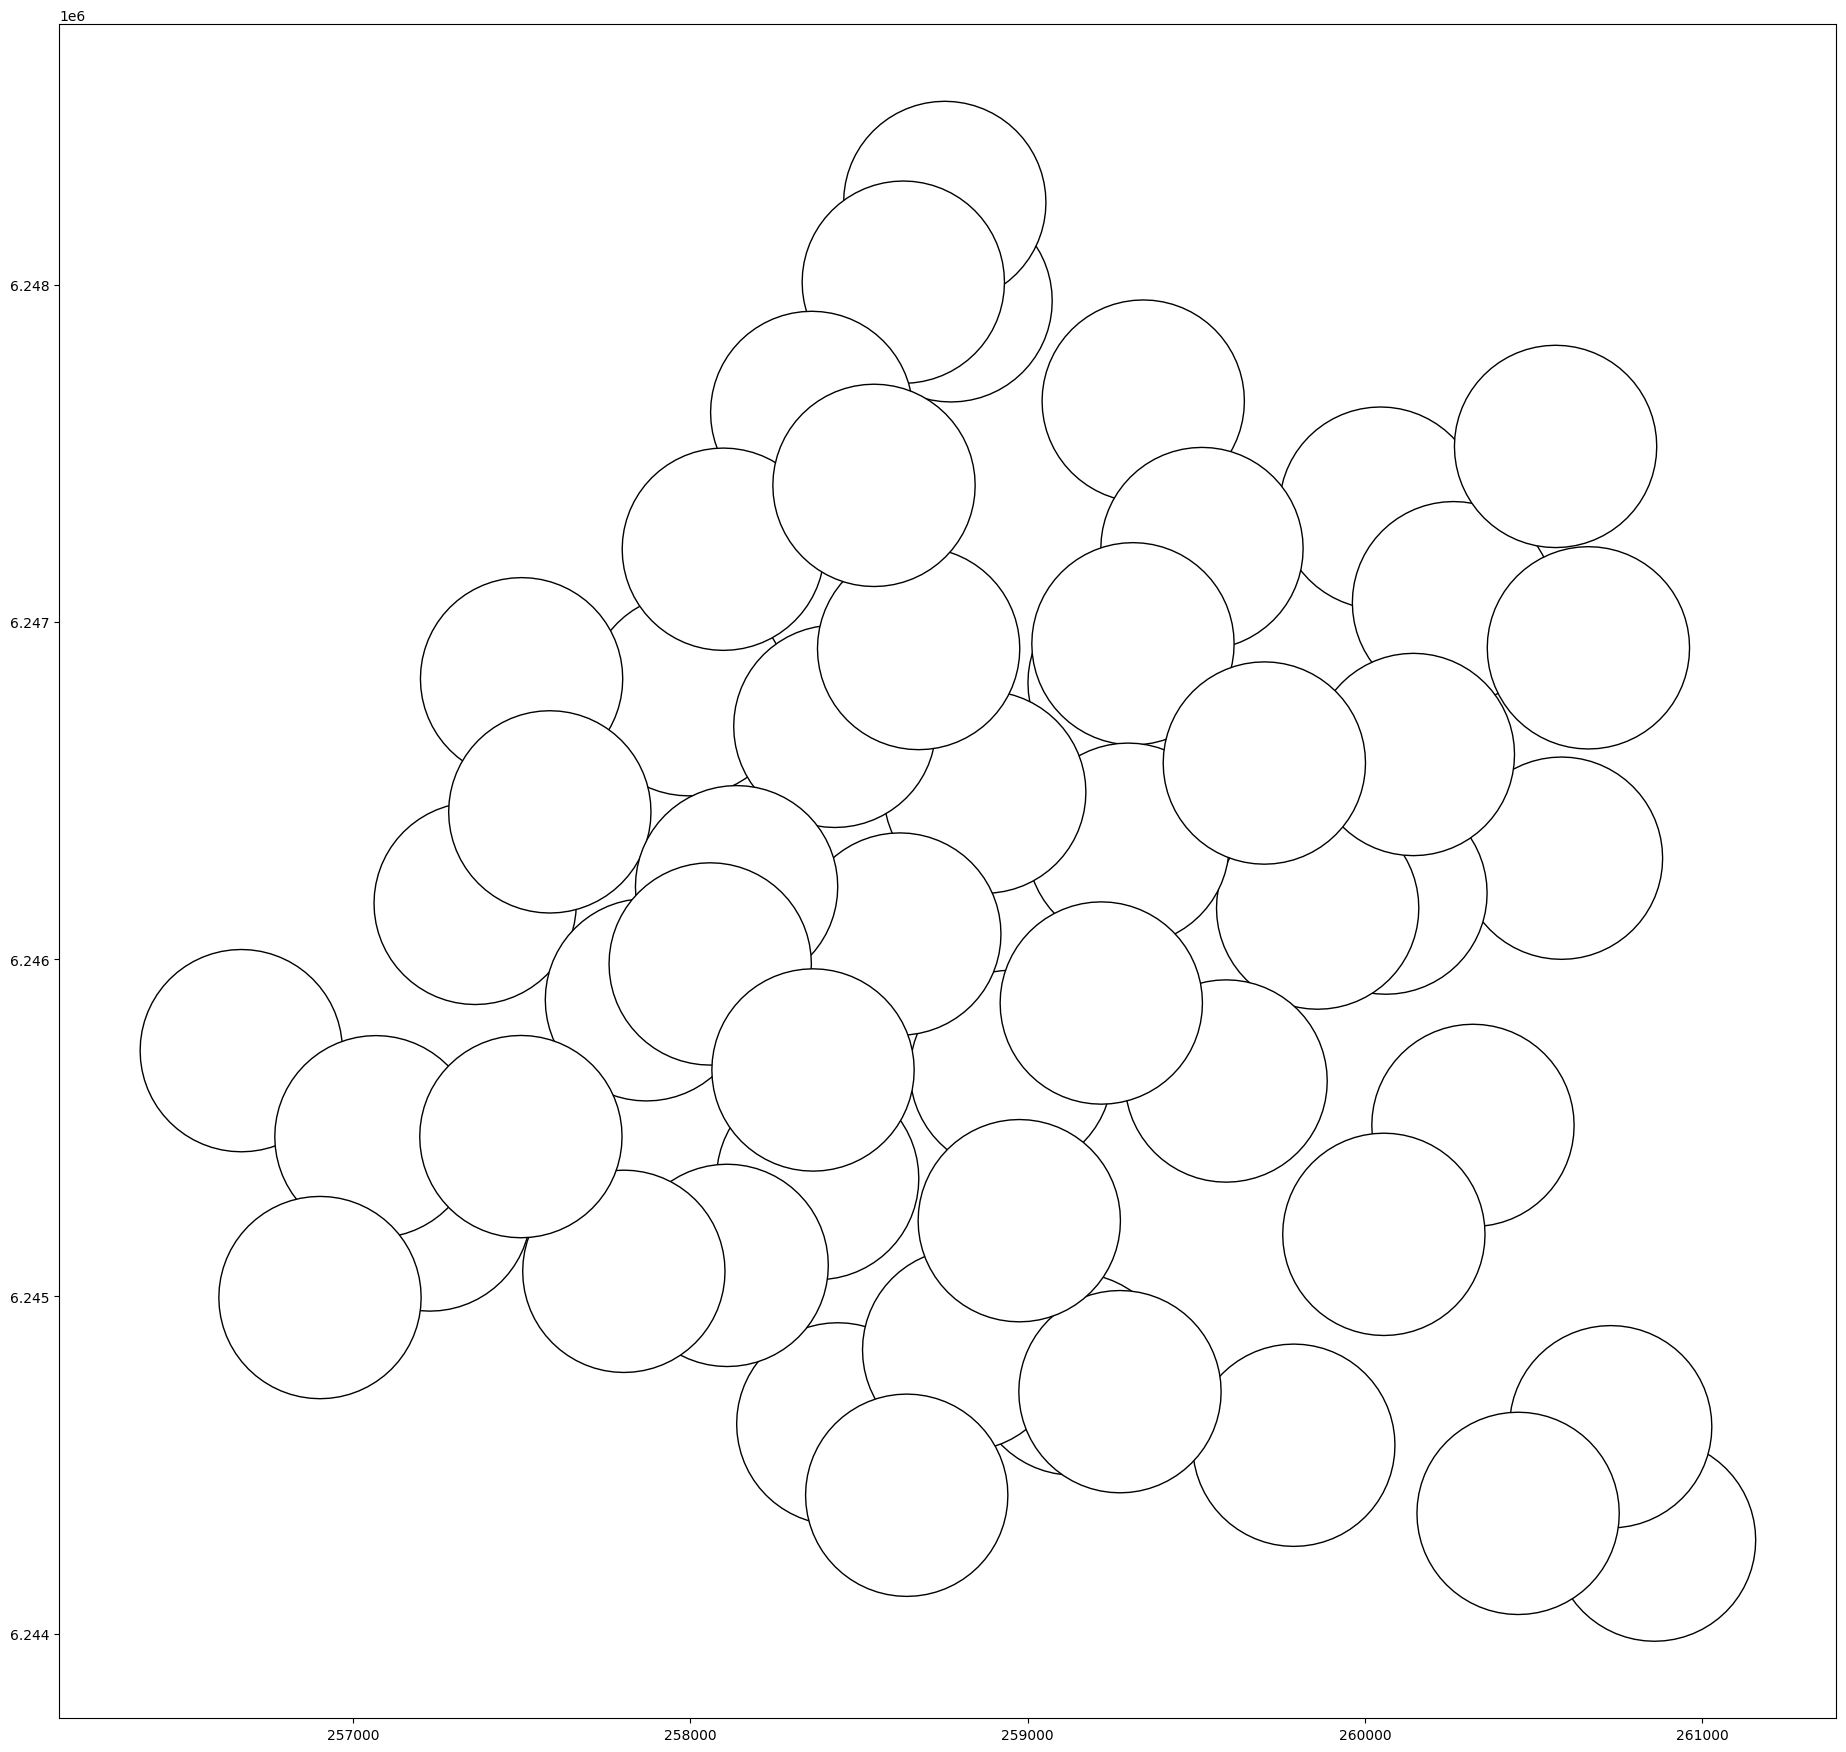

In [151]:
df_bornes_par_quartier_14_areas.plot(figsize = (25, 22), color='white', edgecolor='black')

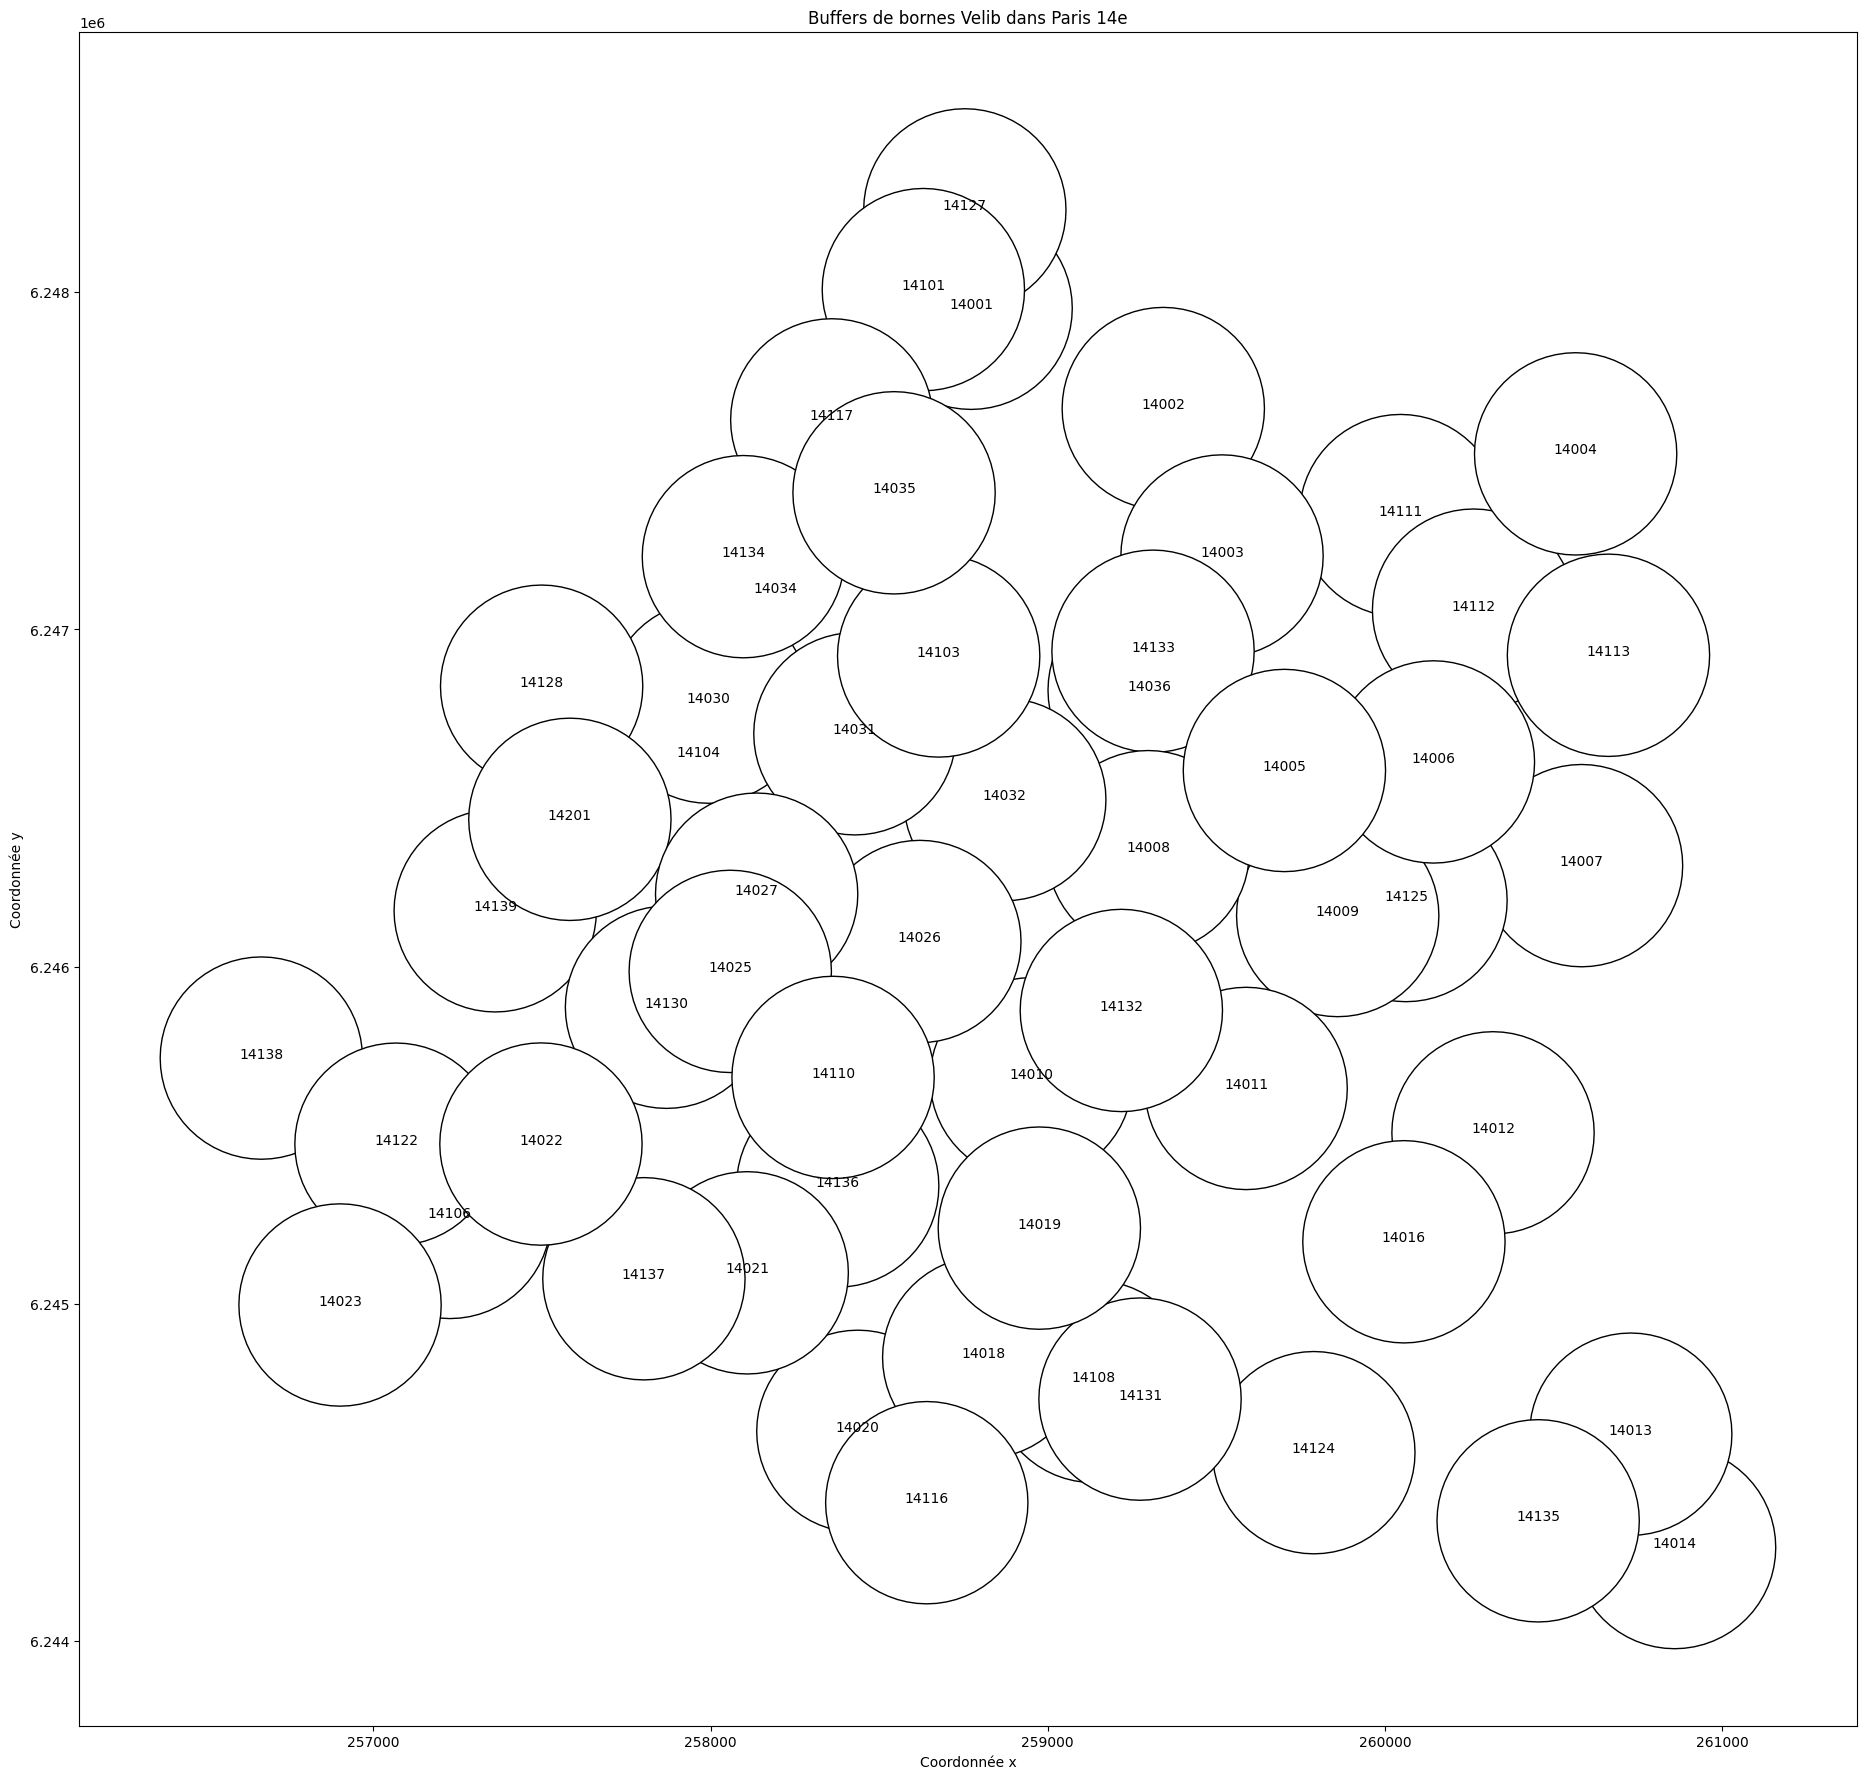

In [152]:
import matplotlib.pyplot as plt

# Afficher les jeux de données sur une carte à imprimer
ax = df_bornes_par_quartier_14_areas.plot(figsize = (25, 22), color='white', edgecolor='black')

# Ajouter une grille de coordonnées et un titre
ax.set_xlabel('Coordonnée x')
ax.set_ylabel('Coordonnée y')
ax.set_title('Buffers de bornes Velib dans Paris 14e')

# Ajouter les étiquettes
for idx, row in df_bornes_par_quartier_14_areas.iterrows():
  ax.annotate(text=idx, xy=row.geometry.centroid.coords[0], horizontalalignment='center', fontsize=10)

# Afficher la carte
plt.show()

In [140]:
!pip install mapclassify

In [153]:
df_bornes_par_quartier_14_areas.explore()

Nous allons pouvoir ensuite déterminer quelle est la meilleure zone pour prendre un vélo, cela se traduit spatialement comme les zones d'intersection du plus grand nombre de zones d'influence de bornes.

Attention, une analyse plus précise pourrait intégrer la colonne numbikesava qui contient le nombre de vélos disponible pour une borne. Ici nous n'allons pas intégrer ce paramètre.

In [154]:
import geopandas as gpd

polygons = df_bornes_par_quartier_14_areas.geometry

# Initialiser un dictionnaire pour stocker le nombre d'intersections pour chaque polygone
intersection_count = {i: 0 for i in polygons.index} #id : identifiant de la borne

# Boucle pour parcourir chaque polygone de la série
for i in polygons.index:
    poly1 = polygons[i]
    for j in polygons.index:
        if i != j:
            poly2 = polygons[j]
            # Calculer l'intersection entre deux polygones
            if poly1.intersects(poly2):
                intersection_count[i] += 1  # Compter l'intersection
                # l'intersection est une opération symetrique mais on ne tient compte que d'un sens

print(intersection_count)


{'14014': 2, '14013': 2, '14012': 1, '14124': 1, '14007': 2, '14016': 1, '14125': 4, '14135': 2, '14009': 5, '14111': 3, '14002': 1, '14003': 4, '14036': 5, '14001': 4, '14112': 4, '14006': 5, '14113': 1, '14127': 2, '14101': 3, '14133': 4, '14004': 2, '14108': 3, '14020': 3, '14008': 6, '14136': 2, '14021': 3, '14018': 5, '14116': 2, '14010': 4, '14131': 4, '14032': 5, '14011': 2, '14019': 4, '14132': 3, '14005': 6, '14138': 1, '14106': 3, '14034': 7, '14117': 5, '14104': 6, '14139': 2, '14130': 5, '14122': 4, '14030': 7, '14128': 3, '14031': 6, '14026': 5, '14137': 2, '14103': 4, '14022': 4, '14023': 2, '14134': 4, '14201': 5, '14035': 5, '14027': 8, '14025': 4, '14110': 6}


In [ ]:
#intersection_count['14036'] #5
#intersection_count['14009'] #5
#intersection_count['14125'] #4
intersection_count['14016'] #4


In [155]:
bornes_a_utiliser = sorted(intersection_count.items(), key=lambda x: x[1], reverse=True)

In [156]:
bornes_a_utiliser

[('14027', 8),
 ('14034', 7),
 ('14030', 7),
 ('14008', 6),
 ('14005', 6),
 ('14104', 6),
 ('14031', 6),
 ('14110', 6),
 ('14009', 5),
 ('14036', 5),
 ('14006', 5),
 ('14018', 5),
 ('14032', 5),
 ('14117', 5),
 ('14130', 5),
 ('14026', 5),
 ('14201', 5),
 ('14035', 5),
 ('14125', 4),
 ('14003', 4),
 ('14001', 4),
 ('14112', 4),
 ('14133', 4),
 ('14010', 4),
 ('14131', 4),
 ('14019', 4),
 ('14122', 4),
 ('14103', 4),
 ('14022', 4),
 ('14134', 4),
 ('14025', 4),
 ('14111', 3),
 ('14101', 3),
 ('14108', 3),
 ('14020', 3),
 ('14021', 3),
 ('14132', 3),
 ('14106', 3),
 ('14128', 3),
 ('14014', 2),
 ('14013', 2),
 ('14007', 2),
 ('14135', 2),
 ('14127', 2),
 ('14004', 2),
 ('14136', 2),
 ('14116', 2),
 ('14011', 2),
 ('14139', 2),
 ('14137', 2),
 ('14023', 2),
 ('14012', 1),
 ('14124', 1),
 ('14016', 1),
 ('14002', 1),
 ('14113', 1),
 ('14138', 1)]

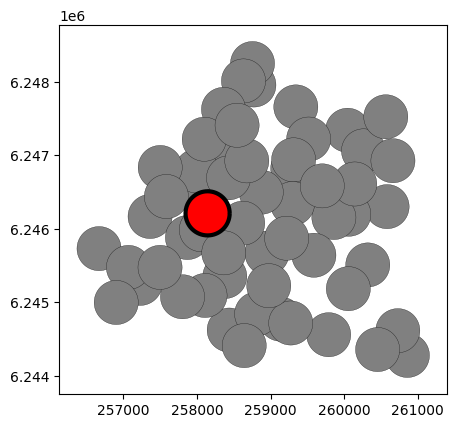

In [158]:
# créer la carte
ax = df_bornes_par_quartier_14_areas.plot(color='grey',edgecolor='black', linewidth=0.2)

# recuperer le polygone a mettre en evidence
souligner_polygone = df_bornes_par_quartier_14_areas[df_bornes_par_quartier_14_areas.index == '14027']

# mettre en évidence le polygone
souligner_polygone.plot(ax=ax, color='red', edgecolor='black', linewidth=3)

#mettre à jour la carte
plt.show()

In [164]:
highlight_geom = df_bornes_par_quartier_14_areas[df_bornes_par_quartier_14_areas.index == '14027']

# Créer une carte de base avec folium
m = df_bornes_par_quartier_14_areas.explore()

# Ajouter la géométrie mise en évidence avec un style différent
highlight_geom.explore(m=m, color='red', marker_type='marker', marker_kwds={'icon': folium.Icon(color='red')})


isochrones / bornes accessibles

https://github.com/eemilhaa/walkability-analysis
https://github.com/shakasom/isochronewithosmnx/blob/master/Isochrones.ipynb
